In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
cars = sns.load_dataset('mpg').dropna()
cars.shape

(392, 9)

In [2]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Basic

In [3]:
sns.set_style('whitegrid')

In [4]:
cars.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

In [5]:
f = cars.cylinders.isin([4, 6, 8])
cars = cars[f]

In [6]:
cars.cylinders.value_counts()

cylinders
4    199
8    103
6     83
Name: count, dtype: int64

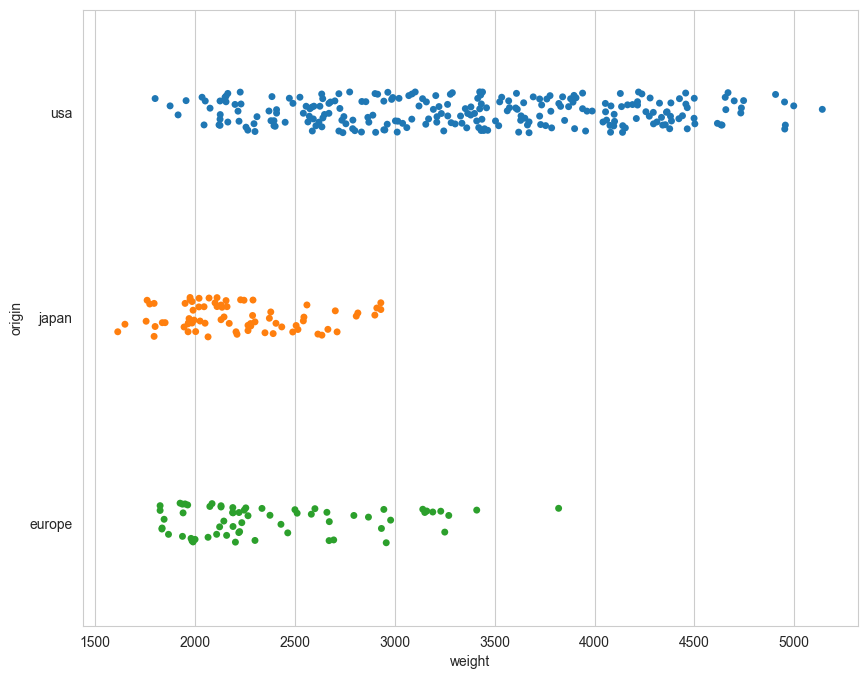

In [7]:
# Set the figure size
plt.figure(figsize=(10, 8))
sns.stripplot(x = cars.weight, y = cars.origin, hue = cars.origin);  # hue is to add color to differentiate them

<Axes: xlabel='weight', ylabel='origin'>

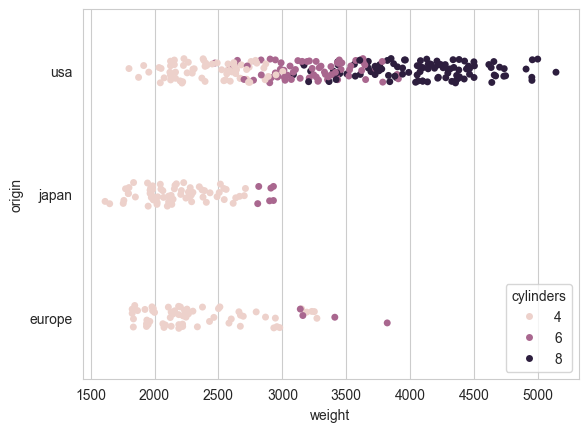

In [8]:
sns.stripplot(data = cars, x='weight', y='origin', hue='cylinders')

<Axes: xlabel='weight', ylabel='origin'>

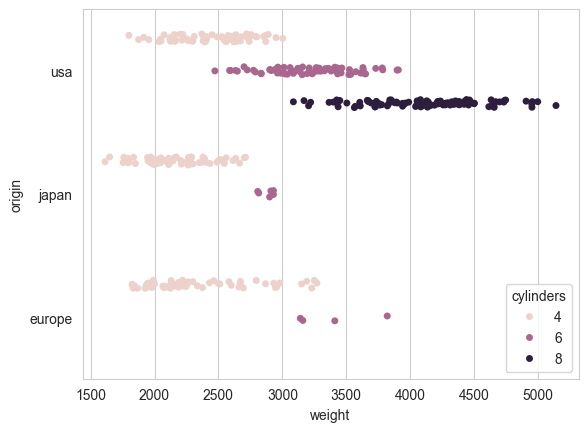

In [9]:
sns.stripplot(data = cars, x='weight', y='origin', hue='cylinders',
              dodge=True)

## Orientation

<Axes: xlabel='origin', ylabel='weight'>

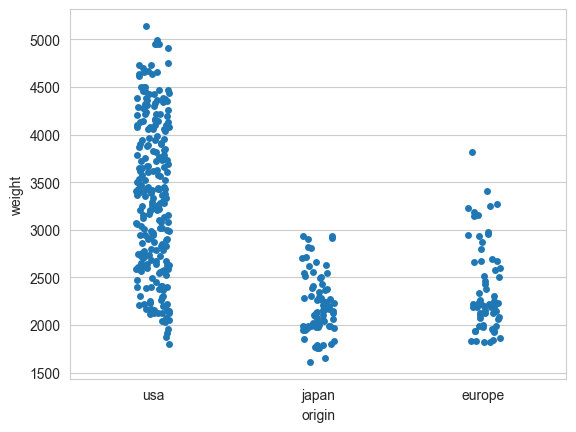

In [10]:
sns.stripplot(data = cars, y='weight', x='origin')

## Styling

In [11]:
sns.set_style=("white")

### jiter

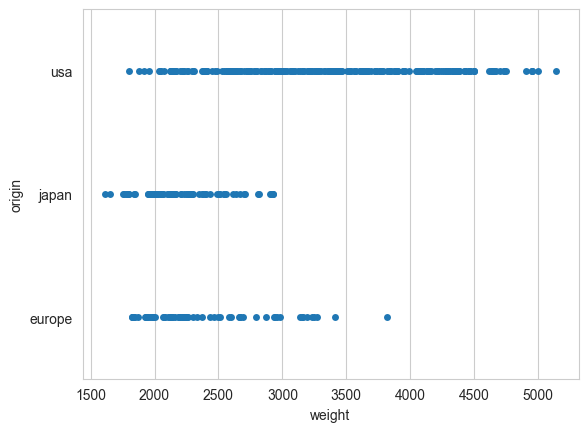

In [12]:
sns.stripplot(data = cars, x='weight', y='origin', jitter=False);

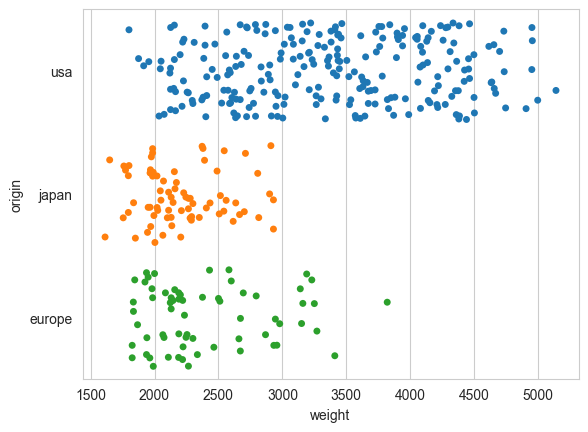

In [13]:
sns.stripplot(data = cars, x='weight', y='origin', hue='origin', jitter=0.4);

In [14]:
from ipywidgets import interactive

def jitter_wights (jitter = 0.1):
    sns.stripplot(data = cars, x='weight', y='origin', hue='origin', jitter=jitter);

interactive(jitter_wights, jitter=(0, 0.65, 0.05))

interactive(children=(FloatSlider(value=0.1, description='jitter', max=0.65, step=0.05), Output()), _dom_class…

### alpha & size

In [17]:
sns.set_style='whitegrid'

<Axes: xlabel='weight', ylabel='origin'>

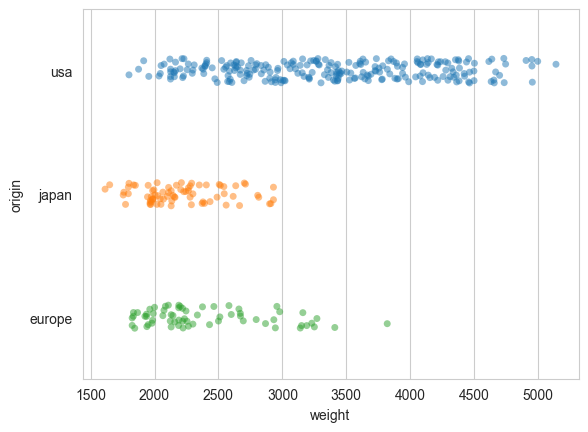

In [24]:
sns.stripplot(data=cars, x='weight', y='origin', hue='origin', 
              alpha= 0.5,
              size=5 # defalt size is just 5
              )

<Axes: xlabel='weight', ylabel='origin'>

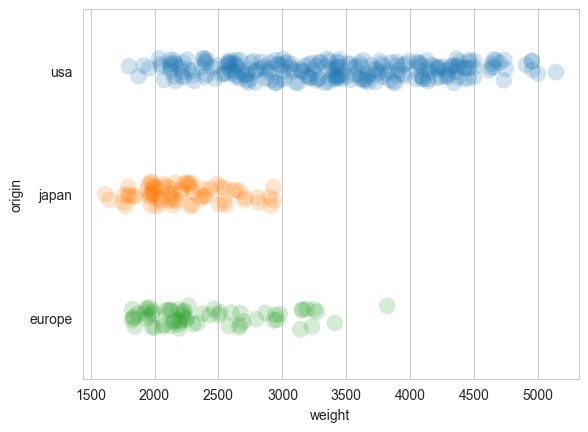

In [29]:
sns.stripplot(data=cars, x='weight', y='origin', hue='origin', 
              alpha= 0.2,
              size=12
              )

### lineWidth & edgeColor

<Axes: xlabel='weight', ylabel='origin'>

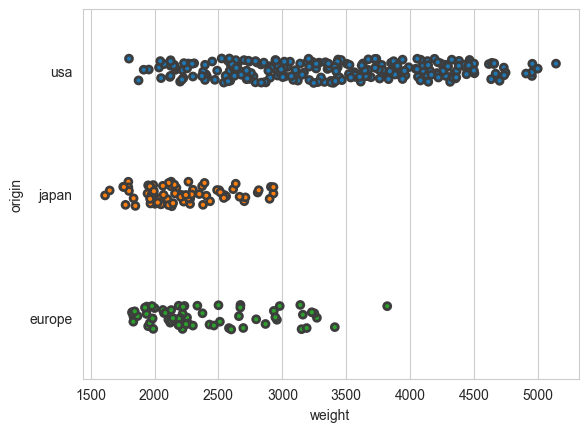

In [30]:
sns.stripplot(data=cars, x='weight', y='origin', hue='origin', 
              linewidth= 2
              )

<Axes: xlabel='weight', ylabel='origin'>

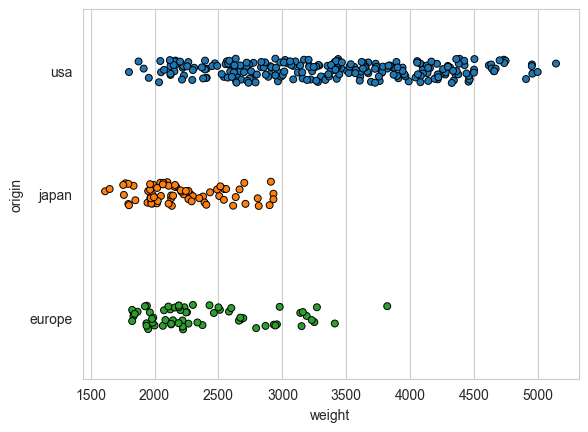

In [41]:
sns.stripplot(data=cars, x='weight', y='origin', hue='origin', 
              linewidth= 0.7,
              edgecolor='black'
              )

### marker

<Axes: xlabel='weight', ylabel='origin'>

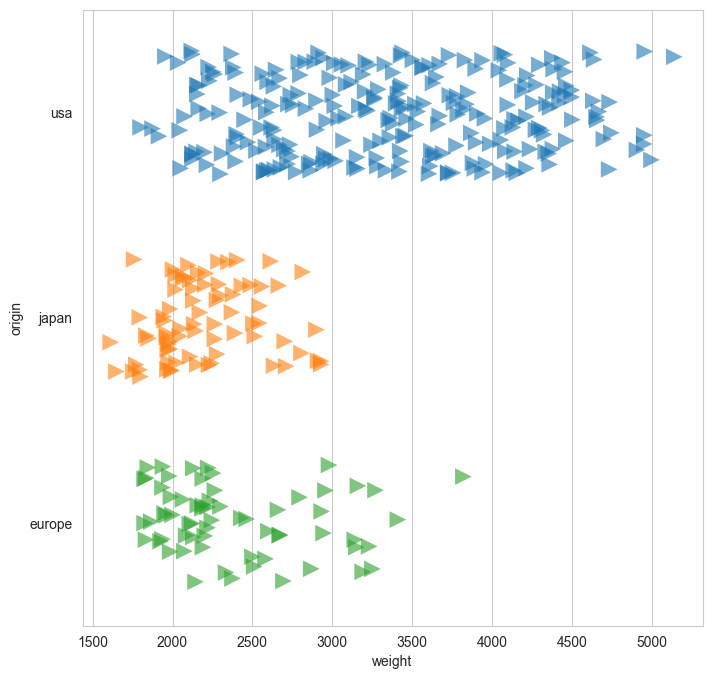

In [74]:
plt.figure(figsize=(8,8))
sns.stripplot(data=cars, x='weight', y='origin', hue='origin', size=12, jitter=0.3, alpha=0.6,
              marker='>'
              )

### have some fun

In [76]:
from ipywidgets import interactive, interactive_output, HBox, VBox
# Assuming you have your 'cars' DataFrame and other necessary imports

def jitter_weights(jitter=0.1):
    plt.figure(figsize=(8, 8))
    sns.stripplot(data=cars, x='weight', y='origin', hue='origin', jitter=jitter)
    plt.show()

def alpha_size(alpha=0.5):
    plt.figure(figsize=(8, 8))
    sns.stripplot(data=cars, x='weight', y='origin', hue='origin', alpha=alpha)
    plt.show()

jitter_interactive = interactive(jitter_weights, jitter=(0, 0.65))
alpha_interactive = interactive(alpha_size, alpha=(0, 1, 0.1))

# Combine the interactive widgets into a single layout
layout = HBox([jitter_interactive, alpha_interactive])

layout


In [78]:
from ipywidgets import interactive, fixed, HBox, VBox, FloatSlider

# Assuming you have your 'cars' DataFrame and other necessary imports

def update_plot(jitter=0.1, alpha=0.5, dot_size=6):
    plt.figure(figsize=(8, 8))
    sns.stripplot(data=cars, x='weight', y='origin', hue='origin', jitter=jitter, alpha=alpha, size=dot_size)
    plt.show()

jitter_slider = FloatSlider(value=0.1, min=0, max=0.65, step=0.01, description='Jitter')
alpha_slider = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Alpha')
dot_size_slider = FloatSlider(value=6, min=1, max=20, step=1, description='Dot Size')

interactive_plot = interactive(update_plot, jitter=jitter_slider, alpha=alpha_slider, dot_size=dot_size_slider)

# Create a layout with the sliders
controls = VBox([jitter_slider, alpha_slider, dot_size_slider])
plot_and_controls = HBox([interactive_plot, controls])

plot_and_controls
